In [1]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from pathlib import Path

# plt.style.use("bmh")
sns.set_style("ticks")


# Load Data
Either use the default of loading in the most recent data (i.e., `filename = None`) or fix it to a specific file.

**Good data results (note to self):**
- `results_2023-04-05_23:11:28.018483.csv` (initial result that has fitting and evaluation)

In [2]:
# filename = None
# # filename = "results_2023-04-05_23:11:28.018483.csv"
# if filename is None:
#     filename = sorted(glob.glob("out/data/*.csv"))[-1]
# else:
#     filename = Path(f"out/data/{filename}")
#
# print(f"{filename=}")
# data = pd.read_csv(filename)
# data = data.replace(to_replace={
#     "no_store": "FuncX",
#     "proxystore": "EndpointStore"
# })
# data.head()

In [3]:
funcx_df = pd.read_csv(Path("out/data/results_2023-04-06_10:15:47.121014__funcx.csv"))
proxy_df = pd.read_csv(Path("out/data/results_2023-04-06_13:09:39.210862_proxystore.csv"))
data = pd.concat([funcx_df, proxy_df])
data = data.replace(to_replace={
    "no_store": "FuncX",
    "proxystore": "EndpointStore"
})
data.head()

,round,endpoint_name,transfer_time,data_transfer_size,model_param_size,model_arch_size,local,test_accuracy,test_loss,train_accuracy,train_loss,num_hidden_blocks,store,time_taken_for_process
0,1.0,hawfinch,3.150909,2281716.0,2281615.0,5596.0,False,0.5002,3.525516,0.20,3.525516,1,FuncX,158.40915
1,1.0,kestrel,4.464043,2281716.0,2281615.0,5596.0,False,0.5002,3.440624,0.24,3.440624,1,FuncX,158.40915
2,1.0,ryerson,4.977898,2281716.0,2281615.0,5596.0,False,0.5002,3.098623,0.21,3.098623,1,FuncX,158.40915
3,1.0,jetson,4.599578,2281716.0,2281615.0,5596.0,False,0.5002,3.867584,0.19,3.867584,1,FuncX,158.40915
4,2.0,hawfinch,3.505748,2281716.0,2281615.0,5596.0,False,0.5511,1.181808,0.59,1.181808,1,FuncX,158.40915


# Percentage Improvement in Transfer Time

In [4]:
percentage_change = lambda old_val, new_val: (new_val - old_val) / old_val * 100

df = data.groupby(["store", "num_hidden_blocks"])["transfer_time"].mean()
changes = []
for blocks in [1, 10, 20, 30, 40]:
    old_val = df["FuncX", blocks]
    new_val = df["EndpointStore", blocks]
    changes.append(percentage_change(old_val, new_val))

print(f"Average percentage decrease from FuncX to EndpointStore: {sum(changes) / len(changes):0.3f}%")

Average percentage decrease from FuncX to EndpointStore: -31.389%


# Transfer Times as Model Complexity Increases

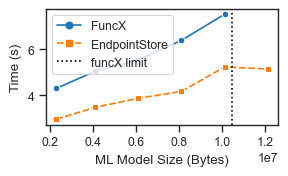

In [5]:
with sns.plotting_context(font_scale=1, context="paper"):
    _ = plt.figure(figsize=(3, 1.5))
    sns.lineplot(
        data=data,
        x="model_param_size",
        y="transfer_time",
        hue="store",
        markers=["o", "s"],
        style="store",
        errorbar=None,
    ).set(xscale="linear")
    plt.xlabel("ML Model Size (Bytes)")
    plt.ylabel("Time (s)")
    # plt.legend(bbox_to_anchor=(0.5, 1.2), ncol=2, loc="upper center")
    plt.axvline(10485760, label="funcX limit", color="k", linestyle=":")
    plt.legend(loc="upper left")
    # plt.tight_layout()
    plt.savefig(Path("out/plots/flox-size-transfer.pdf"), bbox_inches="tight")
    plt.show()

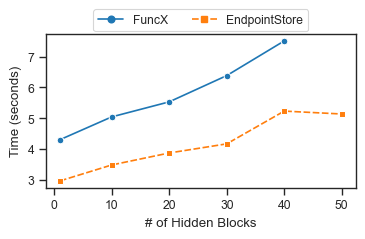

In [6]:
with sns.plotting_context(font_scale=1, context="paper"):
    _ = plt.figure(figsize=(4, 2))
    sns.lineplot(
        data=data,
        x="num_hidden_blocks",
        y="transfer_time",
        hue="store",
        markers=["o", "s"],
        style="store",
        errorbar=None,
    )  #.set(xscale="log")
    plt.xlabel("# of Hidden Blocks")
    plt.ylabel("Time (seconds)")
    plt.legend(bbox_to_anchor=(0.5, 1.2), ncol=2, loc="upper center")
    # plt.tight_layout()
    plt.show()

# Other Plots

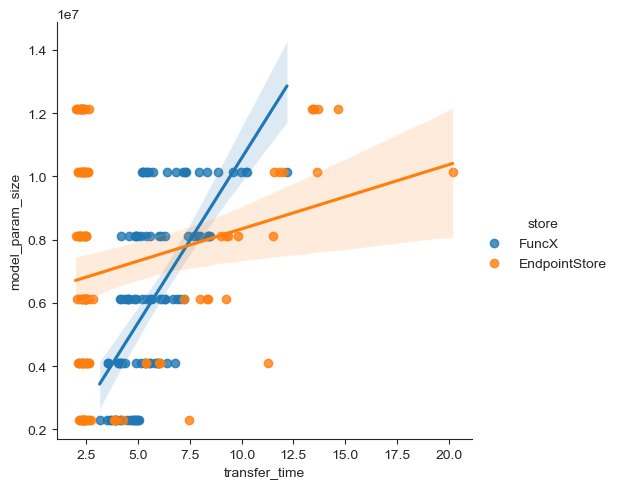

In [7]:
sns.lmplot(
    data=data,
    x="transfer_time",
    y="model_param_size",
    hue="store",
)
plt.show()

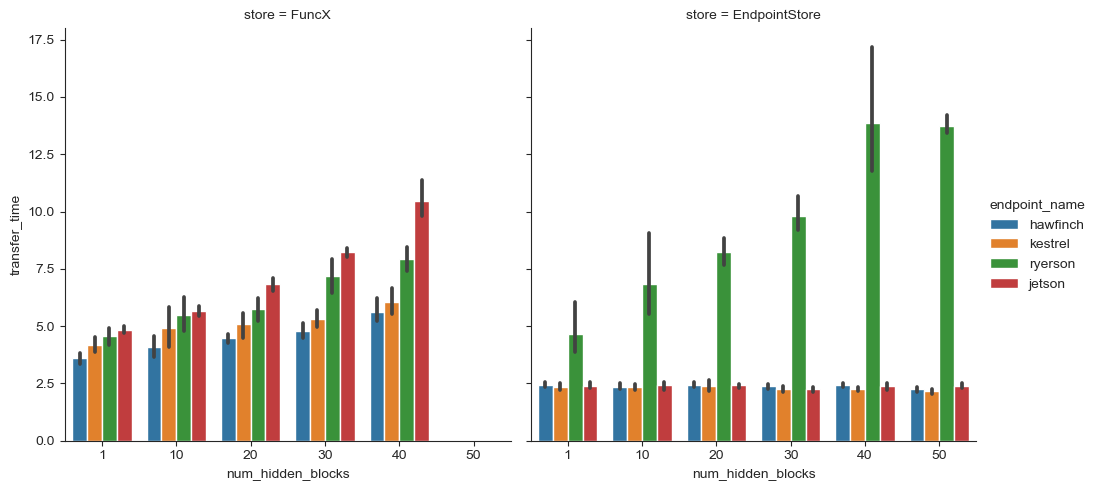

In [8]:
sns.catplot(
    data=data,
    kind="bar",
    col="store",
    x="num_hidden_blocks",
    y="transfer_time",
    hue="endpoint_name",
    sharey=True
)
plt.show()

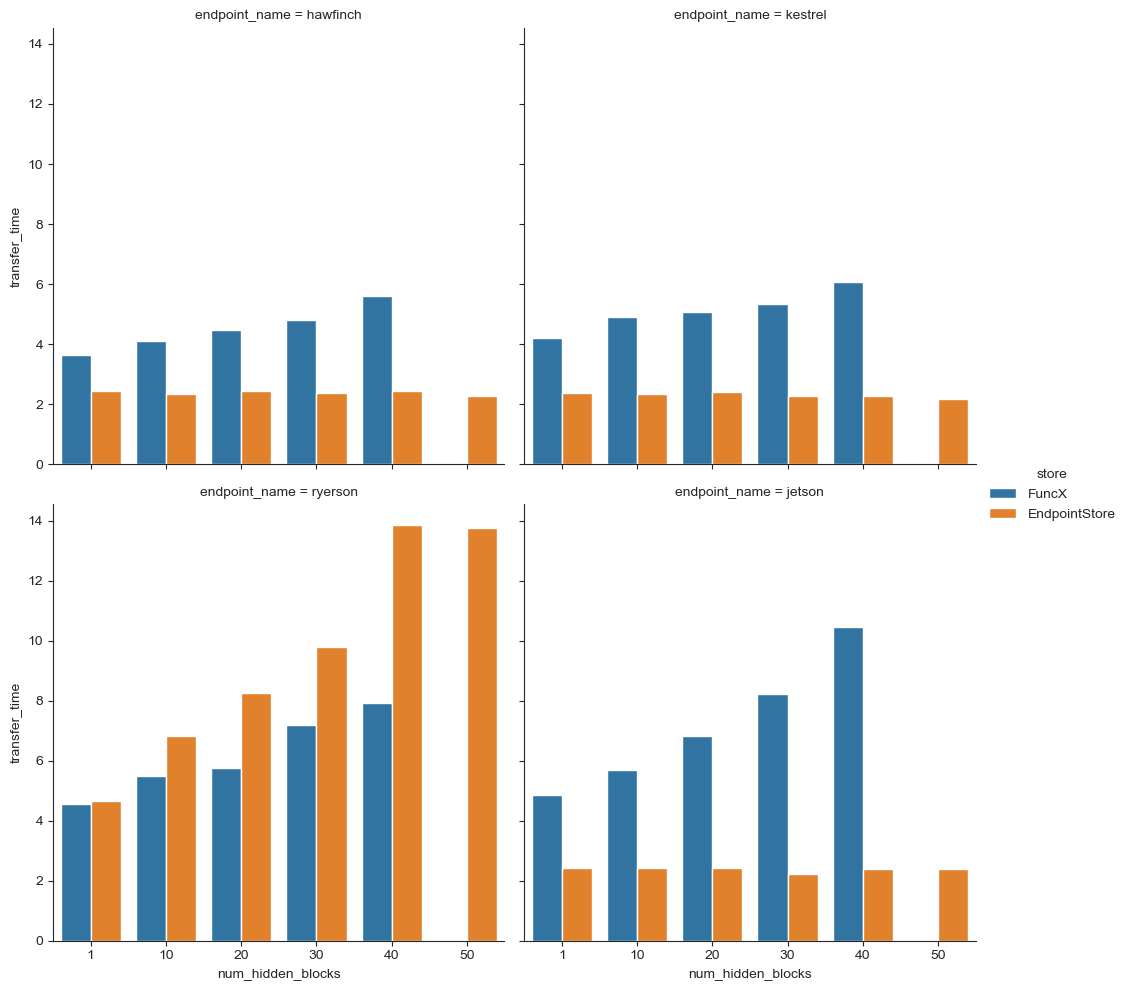

In [9]:
sns.catplot(
    data=data,
    kind="bar",
    col="endpoint_name",
    col_wrap=2,
    x="num_hidden_blocks",
    y="transfer_time",
    hue="store",
    errorbar=None,
    sharey=True
)
plt.show()